In [1]:
import tensorflow as tf
from utils.architectures import residual_attention_56
from utils.plot import getAccuracyPlot, getLossPlot

In [2]:
cifar100 = tf.keras.datasets.cifar100 #load dataset
(X_train, y_train), (X_test, y_test) = cifar100.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 100) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 100) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 100

In [3]:
model = residual_attention_56(input_shape=input_shape, output_size=output_size)

In [4]:
model.compile(tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 16, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 16, 16, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [6]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=100)

Epoch 1/100
625/625 [==============================] - 52s 66ms/step - loss: 4.4111 - accuracy: 0.0435 - val_loss: 4.0294 - val_accuracy: 0.0813
Epoch 2/100
625/625 [==============================] - 38s 61ms/step - loss: 3.9108 - accuracy: 0.1048 - val_loss: 3.8748 - val_accuracy: 0.1049
Epoch 3/100
625/625 [==============================] - 39s 62ms/step - loss: 3.7354 - accuracy: 0.1269 - val_loss: 3.8350 - val_accuracy: 0.1087
Epoch 4/100
625/625 [==============================] - 38s 61ms/step - loss: 3.6289 - accuracy: 0.1441 - val_loss: 3.6378 - val_accuracy: 0.1359
Epoch 5/100
625/625 [==============================] - 38s 61ms/step - loss: 3.5382 - accuracy: 0.1609 - val_loss: 3.6802 - val_accuracy: 0.1353
Epoch 6/100
625/625 [==============================] - 38s 61ms/step - loss: 3.4598 - accuracy: 0.1726 - val_loss: 3.5614 - val_accuracy: 0.1470
Epoch 7/100
625/625 [==============================] - 38s 61ms/step - loss: 3.3898 - accuracy: 0.1871 - val_loss: 3.6267 - val_ac

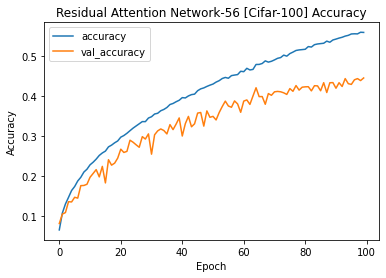

In [7]:
getAccuracyPlot(history, 'Residual Attention Network-56 [Cifar-100]')

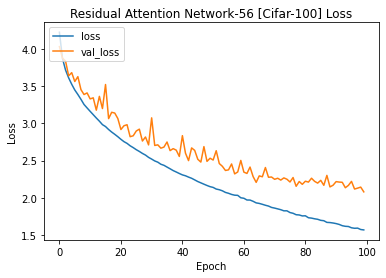

In [8]:
getLossPlot(history, 'Residual Attention Network-56 [Cifar-100]')

In [9]:
model.save('cifar100_att56_epoch100_SGD.h5')

In [3]:
from tensorflow.keras.models import load_model
model = load_model('cifar100_att56_epoch100.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 9s 14ms/step - loss: 2.0507 - accuracy: 0.4703


[2.050687551498413, 0.47029998898506165]